<a href="https://colab.research.google.com/github/DAVOR2003/ADA/blob/main/informe6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descripcion del problema

**Entrada:** Conjunto de números $A = [a_1,a_2,a_3,...,a_n]$ y un índice $k$

**Salida:** Valor $n$, que es mayor a $i-1$ elementos de $A$


En la rama de la estadística, es muy importante obtener ciertos valores, como el mínimo y máximo valor de una muestra, la mediana u otros cuantiles de muestra. Entre ellos se encuentra el estadístico de orden , que corresponde al i-ésimo valor más pequeño de una muestra estadística.

![image.png](https://imgur.com/8gorIah.jpg)

#2-Descripcion algoritmo

##2.2 Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $arr$ con la secuencia de $n$ elementos del que se desea conocer su i-ésimo elemento menor.

1. Si el arreglo de entrada posee un largo 1, entonces técnicamente su único elemento es el i-ésimo elemento menor, por lo que se retorna.

2. Para cada llamada recursiva, `Select` consigue un pivote adecuado para el arreglo llamando a la función `PivotSelection`.

3. `PivotSelection` divide el arreglo en subconjuntos de 5 elementos cada uno a lo más para luego ordenarlos con InsertionSort. Después se consigue la mediana de cada subarreglo y se insertan en un arreglo auxiliar. Dicho arreglo se ordena con InsertionSort y se consigue la mediana de las medianas.

4. Luego, se utiliza la mediana conseguida como pivote para particionar el arreglo de entrada con la función `Partition`.

5. Si el i-ésimo elemento menor buscado se encuentra en la misma posición del pivote, se retorna el elemento contenido en dicha posición. De lo contrario:

 * Si la posición del pivote es mayor a la del i-ésimo elemento, se regresa al **paso 1** con la partición izquierda.

 * Si la posición del pivote es menor a la del i-ésimo elemento, se regresa al **paso 1** con la partición derecha.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.


#Codigo

In [1]:
import random
from termcolor import colored


def insertionSort(arr, cont, verbose = True):

  for i in range(0, len(arr) ):
    aux = arr[i]
    j = i-1
    while j >= inicio and aux < arr[j] :
        cont[0] += 1
        arr[j+1] = arr[j]
        j -= 1
        arr[j+1] = aux

  return arr

def partition(arr, l, r, cont, verbose = True):

    x = pivotSelection(arr,l,r, cont, verbose)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]
    return i

def pivotSelection(arr, izq, der, cont, verbose = True):

    auxArr = arr #Arreglo auxiliar para no alterar el orden del arreglo original

    cont[0] += 1
    if der-izq <= 5:     #Si el arreglo tiene 5 o menos elementos, no hace falta dividirlo 
      insertionSort(auxArr,cont) #Luego de ordenar, la mediana será el valor del medio
      if(verbose):
        print(colored(f"El largo del arreglo es menor o igual a 5", "red"))
        print(colored(f"Mediana: {auxArr[round((der-izq)/2)]}", "green"))
      return auxArr[round((der-izq)/2)]

    medianas = []


    #Se crean n/5 subarreglos 
    for i in range(izq, der, 5):
      subDer = i+4
      cont[0]+=1
      if(subDer > der):
        subDer = der

      subArr = arr[:subDer+1]
      subArr = subArr[i:]
      #print(subArr)
      insertionSort(subArr,cont)    
      #Se guarda la mediana en un arreglo de medianas
      if(verbose == True):
        print(colored(f"La mediana del sub-arreglo", "green"), colored(f"{subArr}", "blue"), colored(f" es:", "green"), colored(f" {subArr[round(len(subArr)/2)]}", "blue"))
      medianas.append(subArr[round(len(subArr)/2)])
    if verbose:
      print(colored(f"\nArreglo de medianas: {medianas}", "green"))
    #Se llama recursivamente a esta función pasandole el arreglo de medianas
    return pivotSelection(medianas, 0, len(medianas), cont, verbose)



def select(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
        if(verbose == True):
          print(colored(f"El valor que se busca es: {key}", "green"))
          print(colored(f"El arreglo se pasa Partition\n", "yellow"))
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if(verbose == True):
          print(colored(f"\nEl indice obtenido es: {index}", "yellow"))
          print(colored(f"Arreglo luego de partition {arr}\n", "blue"))

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if(verbose == True):
              print(colored(f"El indice es igual al valor que se busca {arr[index]}", "green"))
            return arr[index]
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
               print(colored(f"Se busca en la mitad: {arr[:index]}", "red"))

            return select(arr, l, index - 1, k, cont, verbose)

        if(verbose):
               print(colored(f"Se busca en la mitad: {arr[index:]}", "red"))

        return select(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print(colored(f"ERROR", "red"))

n = random.randint(10,30)
arr = random.sample(range(-50, 100), n)
#arr = [7, 4, 9, 2, 11, 1, 3, 19, 8]
print(colored(f"Arreglo recibido: {arr}\n", "magenta"))
inicio = 0; limit = 1; key = 3
cont = [0]
k_esimo = select(arr, inicio, len(arr)-1, key, cont, False)
print(colored(f"\nArreglo: {arr}", "green"))
print(colored(f"3° valor más pequeño: {k_esimo}\t Contador: {cont}", "green"))

Arreglo recibido: [-18, 11, 23, 55, 1, -8, 71, 19, -25, 40, 44, -24, -43, 76, -31, -27, -45, 10, 37, -2, -39, 83, -35]


Arreglo: [-45, -43, -39, -35, -31, -27, -25, -24, -18, -8, -2, 1, 10, 11, 19, 23, 37, 40, 44, 55, 71, 76, 83]
3° valor más pequeño: -39	 Contador: [182]


##2.3 Ejemplo

Considere el arreglo, del cual es desea conocer su séptimo elemento menor:

$A = [3, 1, 4, 7, 9, 11, 10, 8]$

En primer lugar y para hallar el pivote adecuado, se divide el arreglo en subconjuntos de 5 elementos cada uno a lo más.

$A_1 = [3, 1, 4, 7, 9] ;  A_2 = [11, 10, 8]$

Luego, cada subarreglo es ordenado de menor a mayor.

$A_1 = [1, 3, 4, 7, 9] ; A_2 = [8, 10, 11]$

Después, se consigue la mediana de cada subarreglo y se guardan sus valores en un arreglo auxiliar.

$ Med = [4 (A_1), 10 (A_2)] $

Acto seguido, se ordena este subarreglo de medianas y se consigue la mediana de las medianas.

$MedianaMedianas = 7$

Como la posición de la mediana de medianas en el arreglo de entrada, es decir, la cuarta posición es menor a la del séptimo elemento menor buscado, se realiza partición en 7 y se realiza el procedimiento nuevamente, pero con la partición derecha.

$A_b = [9, 11, 10, 8]$

Se divide el arreglo en subconjuntos de 5 elementos cada uno a lo más.

$Ab_1 = [9, 11, 10, 8]$

Luego, cada subarreglo es ordenado de menor a mayor.

$Ab_1 = [8, 9, 11, 10]$

Se consigue la mediana de cada subarreglo y se guardan sus valores en un arreglo auxiliar.

$Medianas = [10 (Ab_1)]$

Como el arreglo de medianas es de largo 1, su único elemento es la mediana de las medianas.

$MedianaMedianas = 10$

Como la posición de la mediana de medianas en el arreglo de entrada, la séptima posición, es igual a la del séptimo elemento menor buscado, se dice por ende que **el séptimo elemento menor del arreglo de entrada es 10**.


#Paso a paso (verbose=True)

In [2]:
n = random.randint(1,37)
arr = random.sample(range(-50, 100), n)
print(colored(f"Arreglo recibido: {arr}\n", "magenta"))
cont = [0]
k_esimo = select(arr, inicio, len(arr)-1, key, cont, True)
print(colored(f"\nArreglo: {arr}", "green"))
print(colored(f"3° valor más pequeño: {k_esimo}\t Contador: {cont}", "green"))

Arreglo recibido: [93, 26, -48, -17, -14, 74, 41, 18, -42, 15, 31, -37, 7, 91, 47, 51, 84, -25, -27, 10, 46, 81, 60, -29, 27, 66, 12, 75, -38, 44, 21, 2]

El valor que se busca es: 3
El arreglo se pasa Partition

La mediana del sub-arreglo [-48, -17, -14, 26, 93]  es:  -14
La mediana del sub-arreglo [-42, 15, 18, 41, 74]  es:  18
La mediana del sub-arreglo [-37, 7, 31, 47, 91]  es:  31
La mediana del sub-arreglo [-27, -25, 10, 51, 84]  es:  10
La mediana del sub-arreglo [-29, 27, 46, 60, 81]  es:  46
La mediana del sub-arreglo [-38, 12, 44, 66, 75]  es:  44
La mediana del sub-arreglo [2, 21]  es:  21

Arreglo de medianas: [-14, 18, 31, 10, 46, 44, 21]
La mediana del sub-arreglo [-14, 10, 18, 31, 46]  es:  18
La mediana del sub-arreglo [21, 44]  es:  44

Arreglo de medianas: [18, 44]
El largo del arreglo es menor o igual a 5
Mediana: 44

El indice obtenido es: 20
Arreglo luego de partition [26, -48, -17, -14, 41, 18, -42, 15, 31, -37, 7, -25, -27, 10, -29, 27, 12, -38, 44, 21, 2, 81, 60

#3.Tiempo de ejecución



El tiempo de ejecución de este algoritmo se basa en las funciones que realiza este algoritmo para poder cumplir su objetivo de manera eficiente, sabemos que:



> **Insertion Sort**: En el mejor caso, su tiempo de ejecución es $O(1)$ y en el peor es $O(n^2)$, pero nos quedaremos con el dato de mejor caso.



> **Partition y pivotSelection** : Estas funciones tiene un tiempo de ejecución lineal, $O(n)$


> Nuestro arreglo "medianas" contiene n/5 elementos  y esto se obtiene a la recursividad de los llamados para poder encontrar la mediana de medianas, es por esto, que el tiempo de ejecución para poder llevar a cabo lo mencionado anteriormente es $T(n/5)$.



> Nuestro peor caso sería que por cada llamada recursiva el subarreglo contenga $T(7n/10)$ elementos.


Finalmente, tenemos : **T(n) = O(n) + T(7n/10) + T(n/5)**, desarrollandolo:

T(n) = an +  T(7n/10) + T(n/5)

cn >= T(7n/10) + T(n/5) + an

cn >= cn/5 + 7cn/10 + an

c > 9c/10 + a

c/10 >= a

c >= 10a

Por lo que: ***T(n) = O(n)***


#4-Correctitud

Select encuentra el n-ésimo elementos menor de un arreglo  de largo $k$, siempre que n <= k.

Dado que Select es una función recursiva utilizaremos inducción matemática:

    Se asume que Insertion, Partition y PivotSelect son correctos.

> Caso base (k = 1): En este caso solo existe un elemento en el arreglo, por lo que este es el n-ésimo menor elemento. 

> Caso general: Si luego de obtener la mediana de las medianas, esta no es el n-ésimo valor buscado, entonces: 
Se aplica este valor como pivote en la función partition. Por lo que el arreglo queda en 2 partes, la izquierda siendo los elementos menores al pivote, mientras que los de la derecha, los mayores.
Después se comprobará si el pivote es menor o mayor al n-ésimo elemento, si es menor se comprobarán los valores que se encuentran en la derecha del arreglo, en caso contrario se buscaran en el sector izquierdo.
> Después de identificar la mitad correcto, se "enviará" esa mitad a Select nuevamente, hasta llegar al caso base, y dado que este se tomo como correcto, significa que el caso general también lo es.


#5-Experimentos

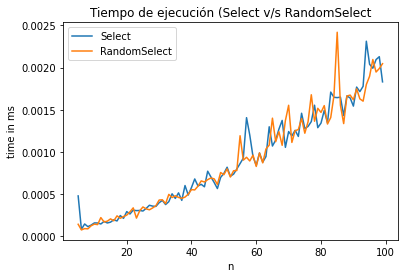

In [3]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def partition(arr, l, r, cont, verbose = True):

    auxArr = arr[l:r+1]
    x = random.choice(auxArr)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]

    return i
  
def RandomSelect(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
  
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if verbose:
          print("\nArreglo:", arr[l:r+1])
          print("Indice encontrado:",index)

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if verbose:
              print("El indice es igual al limite derecho")

            return arr[index]
  
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
              print("Mitad que contiene el valor", arr[:index])

            return RandomSelect(arr, l, index - 1, k, cont, verbose)

        if(verbose):
              print("Mitad que contiene el valor", arr[index:])

        return RandomSelect(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print("Entrada invalida")

x=[]; y=[]; x2=[]; y2=[]; cont = [0]

for n in range(5,100):
  nums = []
  nums2 = []

  for i in range(0,n):
    
    a = random.sample(range(1, 1000), n)
    nums.append(a)
    nums2.append(a)
    
  k = random.randrange(1,len(nums)-1)
  t = repeat(setup="from __main__ import select", stmt=f"select({nums},{0}, {len(nums)-1},{k}, {cont}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import RandomSelect", stmt=f"RandomSelect({nums2},{0}, {len(nums2)-1},{k}, {cont}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.title("Tiempo de ejecución (Select v/s RandomSelect")
plt.legend(["Select","RandomSelect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En el gráfico se puede ver de que ambos algoritmos presentan un tiempo de ejecución similar. Aunque esto pueda parece contra-intuitivo, debido a que uno elige el pivote de forma aleatoria, las verdaderas posibilidades de que ocurra el caso de que el pivote sea desbalanceado son mucho más pequeñas de lo que podría llegar a parecer.

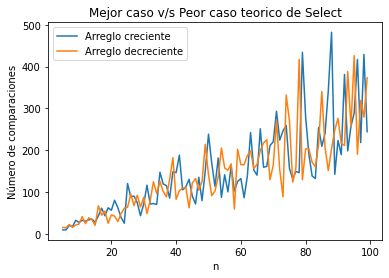

In [4]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,100)] 
y=[]; y2=[]; cont=[0]; cont2=[0]

for n in range(5,100):

  b = [n for n in range(0,n)]
  k = random.randrange(1,len(b)-1)
  counter = select(b, 0, len(b)-1, k,cont,False)
  y.append(cont[0])
  cont[0] = 0

  c = [n for n in range(n,0,-1)]
  k = random.randrange(1,len(c)-1)
  counter = select(b, 0, len(c)-1, k,cont2,False)
  y2.append(cont2[0])
  cont2[0] = 0


plt.plot(x,y)
plt.plot(x,y2)
plt.title("Mejor caso v/s Peor caso teorico de Select")
plt.legend(["Arreglo creciente", "Arreglo decreciente"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

En el gráfico se ve el número de comparaciones entre el mejor y el peor caso de Select, aunque en realidad esas variaciones que se ven se deben principalmente a las funciones auxiliares, como lo son Insertion Sort y Partition, ya que depende del caso que reciban estas se pueden disparar el número de comparaciones, sobre todo teniendo en consideración que el peor caso de Insertion Sort es similar a un mal caso de Partition.